<a href="https://colab.research.google.com/github/Jatin-Ydv/Deep-Learning/blob/main/Untitled15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GENERATING ANIME FACE IMAGES WITH** ***GAN***

**BY:** *JATIN YADAV*

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Creating a separate folder to extract the images from the Zip file :**

In [ ]:
extracted_folder_path = '/content/extracted_images'

# Create a directory to extract the contents
!mkdir -p "$extracted_folder_path"

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/DATA_ANIME/archive (9).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_images')

In [ ]:
import os
print(len(os.listdir('/content/extracted_images/images')))

63565


# **Visualising the extracted images :**

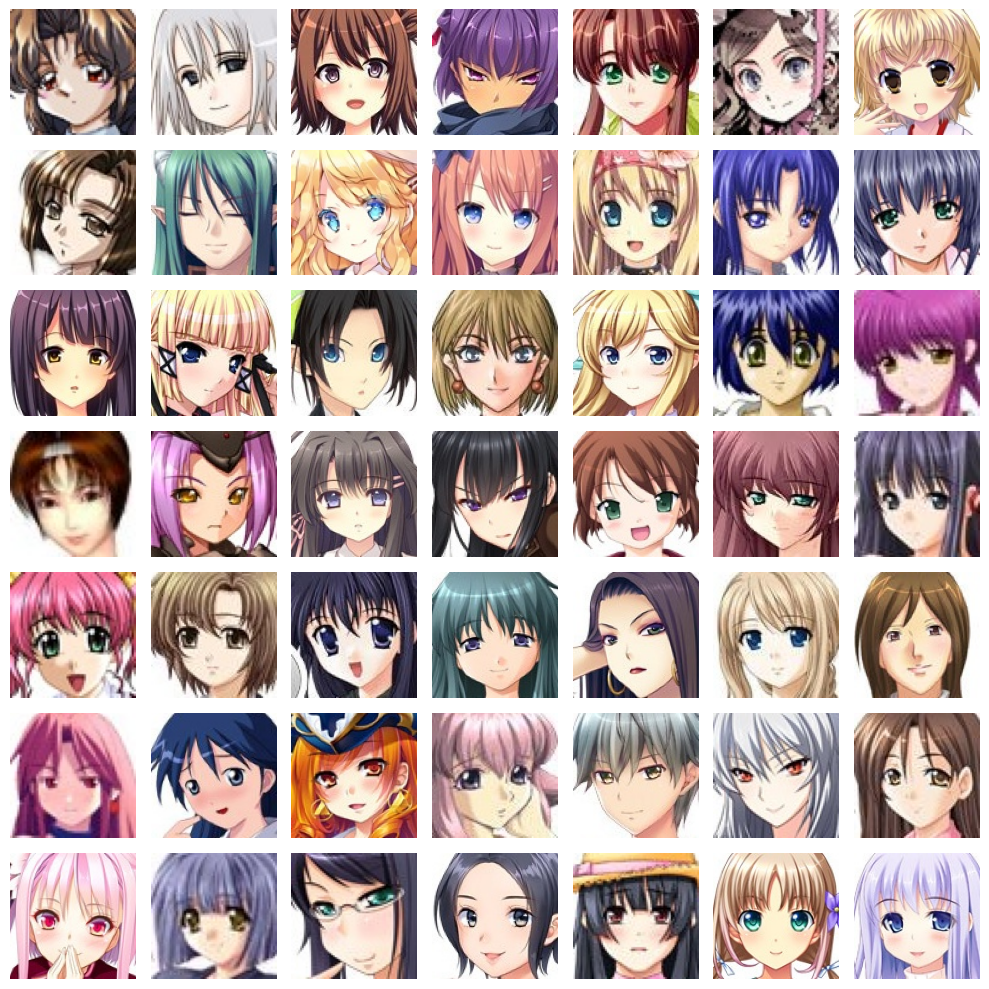

In [ ]:
main_path='/content/extracted_images/images'

import matplotlib.pyplot as plt
import os

# Path to the folder containing images
folder_path = main_path

# Get list of image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith('.png') or file.endswith('.jpg')]

# Ensure we have 49 images
image_files = image_files[:49]

# Create a 7x7 grid for subplots
fig, axes = plt.subplots(7, 7, figsize=(10, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each image file and plot it
for i, file in enumerate(image_files):
    img = plt.imread(os.path.join(folder_path, file))
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis

# Hide any empty subplots
for i in range(len(image_files), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### **I build this GAN model to work on image input of size** *(100,100)* . **Therefore, we need to resize the extracted images of varying sizes in the fixed required format.**

In [ ]:
from PIL import Image
import os

# Path to the folder containing images
folder_path = main_path

# Path to the folder to save resized images
output_folder_path = '/content/fil_images'

# Ensure the output folder exists, if not create it
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Get list of image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith('.png') or file.endswith('.jpg')]

# Fixed size you want the images to be resized to
fixed_size = (100,100)  # Change this to your desired size

# Iterate over each image file and resize it
for file in image_files:
    img_path = os.path.join(folder_path, file)
    output_img_path = os.path.join(output_folder_path, file)
    with Image.open(img_path) as img:
        resized_img = img.resize(fixed_size)
        resized_img.save(output_img_path)

# **Visualising the resized images :**

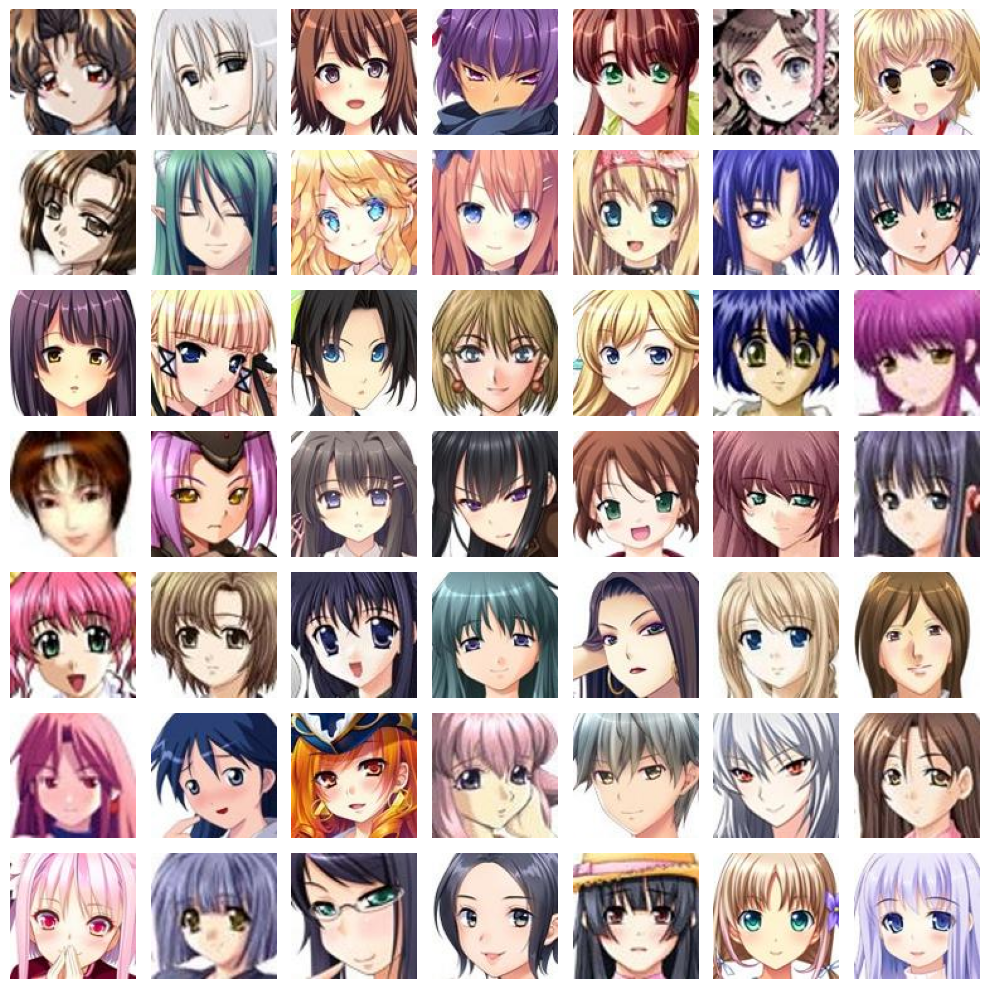

In [ ]:
folder_path = '/content/fil_images'

# Get list of image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith('.png') or file.endswith('.jpg')]

# Ensure we have 49 images
image_files = image_files[:49]

# Create a 7x7 grid for subplots
fig, axes = plt.subplots(7, 7, figsize=(10, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each image file and plot it
for i, file in enumerate(image_files):
    img = plt.imread(os.path.join(folder_path, file))
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis

# Hide any empty subplots
for i in range(len(image_files), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
image_fies=image_files[:10]
for file in image_files:
    img_path = os.path.join(folder_path, file)
    with Image.open(img_path) as img:
        width, height = img.size
        print(f"Image: {file}, Size: {width}x{height}")

Image: 6706_2003.jpg, Size: 100x100
Image: 12026_2005.jpg, Size: 100x100
Image: 61227_2018.jpg, Size: 100x100
Image: 60241_2018.jpg, Size: 100x100
Image: 20032_2007.jpg, Size: 100x100
Image: 55323_2016.jpg, Size: 100x100
Image: 54552_2016.jpg, Size: 100x100
Image: 2674_2002.jpg, Size: 100x100
Image: 31759_2010.jpg, Size: 100x100
Image: 54177_2016.jpg, Size: 100x100
Image: 60484_2018.jpg, Size: 100x100
Image: 30467_2010.jpg, Size: 100x100
Image: 53646_2016.jpg, Size: 100x100
Image: 2390_2001.jpg, Size: 100x100
Image: 57787_2017.jpg, Size: 100x100
Image: 43871_2013.jpg, Size: 100x100
Image: 32049_2010.jpg, Size: 100x100
Image: 14202_2006.jpg, Size: 100x100
Image: 44081_2013.jpg, Size: 100x100
Image: 2235_2001.jpg, Size: 100x100
Image: 19965_2007.jpg, Size: 100x100
Image: 1914_2001.jpg, Size: 100x100
Image: 43929_2013.jpg, Size: 100x100
Image: 37531_2012.jpg, Size: 100x100
Image: 53406_2016.jpg, Size: 100x100
Image: 34877_2011.jpg, Size: 100x100
Image: 13669_2006.jpg, Size: 100x100
Image:

# **BUILDING THE** *GAN* **MODEL :**

In [ ]:
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(in_shape=(100, 100, 3)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# Define the generator model
def define_generator(latent_dim):
    model = Sequential()
    n_nodes = 128 * 25 * 25  # Adjusted based on the input shape of 100x100
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((25, 25, 128)))  # Output shape: (25, 25, 128)
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
    return model

# Define the combined generator and discriminator model
def define_gan(g_model, d_model):
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

# **TRAINING THE GAN MODEL :**

In [ ]:
import os
import cv2
import numpy as np

# Function to load images from a folder
def load_images_from_folder(folder_path,max_len):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(img)
        if len(images)>=max_len:
          break
    return np.array(images)

def load_real_samples(dataset_folder):
    # Load images from the specified folder
    X = load_images_from_folder(dataset_folder,40000)
    # Convert from unsigned ints to floats
    X = X.astype('float32')
    # Scale from [0,255] to [-1,1]
    X = (X - 127.5) / 127.5
    return X

# Example usage:
custom_dataset_folder = "/content/fil_images"
def generate_real_samples(dataset, n_samples):
# choose random instances
  ix = randint(0, dataset.shape[0], n_samples)
  # retrieve selected images
  X = dataset[ix]
  # generate ✬real✬ class labels (1)
  y = ones((n_samples, 1))
  return X, y
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network

  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input
  # use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  X = g_model.predict(x_input)
  # create ✬fake✬ class labels (0)
  y = zeros((n_samples, 1))
  return X, y
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
  # scale from [-1,1] to [0,1]
  examples = (examples + 1) / 2.0
  # plot images
  for i in range(n * n):
  # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i])
  # save plot to file
  filename = 'generated_plot_e%03d.png' % (epoch+1)
  pyplot.savefig(filename)
  pyplot.close()
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
  # prepare real samples
  X_real, y_real = generate_real_samples(dataset, n_samples)
  # evaluate discriminator on real examples
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  # prepare fake examples
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  # evaluate discriminator on fake examples
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
  # save plot
  save_plot(x_fake, epoch)
  # save the generator model tile file
  filename1 = 'generator_model_%03d.h5' % (epoch+1)
  filename2=  '/content/drive/My Drive/DATA_ANIME/generator_model_%03d.h5' % (epoch+1)
  g_model.save(filename1)
  g_model.save(filename2)
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
  # enumerate batches over the training set
    for j in range(bat_per_epo):

      # get randomly selected ✬real✬ samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
      # update discriminator model weights
      d_loss1, _ = d_model.train_on_batch(X_real, y_real)
      # generate ✬fake✬ examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # update discriminator model weights
      d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
      # prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = ones((n_batch, 1))
      # update the generator via the discriminator✬s error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      # summarize loss on this batch
      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
      (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
      # evaluate the model performance, sometimes
    if (i+1) % 1 == 0:
     summarize_performance(i, g_model, d_model, dataset, latent_dim)
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples(custom_dataset_folder)
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

2/2 [==============================] - 1s 12ms/step
>1, 1/312, d1=0.720, d2=0.713 g=0.701
2/2 [==============================] - 0s 24ms/step
>1, 2/312, d1=0.265, d2=0.724 g=0.716
2/2 [==============================] - 0s 24ms/step
>1, 3/312, d1=0.000, d2=0.727 g=0.783
2/2 [==============================] - 0s 23ms/step
>1, 4/312, d1=0.000, d2=0.637 g=0.926
2/2 [==============================] - 0s 23ms/step
>1, 5/312, d1=0.000, d2=0.489 g=1.424
2/2 [==============================] - 0s 23ms/step
>1, 6/312, d1=0.001, d2=0.245 g=2.865
2/2 [==============================] - 0s 23ms/step
>1, 7/312, d1=0.014, d2=0.035 g=5.160
2/2 [==============================] - 0s 23ms/step
>1, 8/312, d1=0.000, d2=0.089 g=9.695
2/2 [==============================] - 0s 23ms/step
>1, 9/312, d1=0.000, d2=0.011 g=13.870
2/2 [==============================] - 0s 23ms/step
>1, 10/312, d1=0.000, d2=0.000 g=12.194
2/2 [==============================] - 0s 23ms/step
>1, 11/312, d1=0.068, d2=4.788 g=6.786
2/2 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 46ms/step
>2, 1/312, d1=0.443, d2=0.267 g=3.102
2/2 [==============================] - 0s 23ms/step
>2, 2/312, d1=0.234, d2=0.299 g=3.132
2/2 [==============================] - 0s 25ms/step
>2, 3/312, d1=0.212, d2=0.292 g=3.223
2/2 [==============================] - 0s 26ms/step
>2, 4/312, d1=0.369, d2=0.597 g=4.423
2/2 [==============================] - 0s 23ms/step
>2, 5/312, d1=0.829, d2=0.760 g=4.253
2/2 [==============================] - 0s 24ms/step
>2, 6/312, d1=0.699, d2=0.431 g=3.598
2/2 [==============================] - 0s 24ms/step
>2, 7/312, d1=0.876, d2=0.621 g=2.112
2/2 [==============================] - 0s 24ms/step
>2, 8/312, d1=0.337, d2=1.304 g=3.860
2/2 [==============================] - 0s 24ms/step
>2, 9/312, d1=1.150, d2=0.232 g=2.100
2/2 [==============================] - 0s 23ms/step
>2, 10/312, d1=0.462, d2=0.528 g=1.935
2/2 [==============================] - 0s 24ms/step
>2, 11/312, d1=0.224, d2=0.373 g=2.264
2/2 [===

2/2 [==============================] - 0s 40ms/step
>3, 1/312, d1=0.724, d2=0.577 g=1.921
2/2 [==============================] - 0s 25ms/step
>3, 2/312, d1=0.467, d2=0.569 g=2.091
2/2 [==============================] - 0s 24ms/step
>3, 3/312, d1=0.606, d2=0.527 g=2.333
2/2 [==============================] - 0s 24ms/step
>3, 4/312, d1=0.760, d2=0.996 g=2.470
2/2 [==============================] - 0s 24ms/step
>3, 5/312, d1=1.204, d2=0.633 g=1.718
2/2 [==============================] - 0s 23ms/step
>3, 6/312, d1=0.840, d2=0.840 g=1.605
2/2 [==============================] - 0s 24ms/step
>3, 7/312, d1=0.752, d2=0.541 g=1.514
2/2 [==============================] - 0s 24ms/step
>3, 8/312, d1=0.651, d2=0.694 g=1.603
2/2 [==============================] - 0s 24ms/step
>3, 9/312, d1=0.565, d2=0.512 g=1.732
2/2 [==============================] - 0s 24ms/step
>3, 10/312, d1=0.635, d2=0.506 g=1.694
2/2 [==============================] - 0s 24ms/step
>3, 11/312, d1=0.499, d2=0.515 g=1.870
2/2 [===

2/2 [==============================] - 0s 41ms/step
>4, 1/312, d1=0.000, d2=0.000 g=67.377
2/2 [==============================] - 0s 24ms/step
>4, 2/312, d1=0.000, d2=0.000 g=67.766
2/2 [==============================] - 0s 26ms/step
>4, 3/312, d1=0.177, d2=0.000 g=63.961
2/2 [==============================] - 0s 23ms/step
>4, 4/312, d1=0.000, d2=0.116 g=70.541
2/2 [==============================] - 0s 23ms/step
>4, 5/312, d1=0.000, d2=0.000 g=79.253
2/2 [==============================] - 0s 24ms/step
>4, 6/312, d1=0.000, d2=0.000 g=79.049
2/2 [==============================] - 0s 24ms/step
>4, 7/312, d1=0.385, d2=0.000 g=67.388
2/2 [==============================] - 0s 24ms/step
>4, 8/312, d1=0.000, d2=0.000 g=63.771
2/2 [==============================] - 0s 25ms/step
>4, 9/312, d1=0.000, d2=0.000 g=63.778
2/2 [==============================] - 0s 23ms/step
>4, 10/312, d1=0.000, d2=0.000 g=64.355
2/2 [==============================] - 0s 23ms/step
>4, 11/312, d1=0.019, d2=0.000 g=53.4

2/2 [==============================] - 0s 38ms/step
>5, 1/312, d1=0.736, d2=0.000 g=137.831
2/2 [==============================] - 0s 23ms/step
>5, 2/312, d1=1.169, d2=0.000 g=96.099
2/2 [==============================] - 0s 23ms/step
>5, 3/312, d1=0.084, d2=0.000 g=67.461
2/2 [==============================] - 0s 20ms/step
>5, 4/312, d1=0.101, d2=1.044 g=98.516
2/2 [==============================] - 0s 23ms/step
>5, 5/312, d1=0.000, d2=0.000 g=126.961
2/2 [==============================] - 0s 23ms/step
>5, 6/312, d1=1.238, d2=0.000 g=99.952
2/2 [==============================] - 0s 23ms/step
>5, 7/312, d1=0.000, d2=0.000 g=91.467
2/2 [==============================] - 0s 23ms/step
>5, 8/312, d1=0.000, d2=0.000 g=74.010
2/2 [==============================] - 0s 24ms/step
>5, 9/312, d1=0.000, d2=0.446 g=127.587
2/2 [==============================] - 0s 24ms/step
>5, 10/312, d1=0.000, d2=0.000 g=185.475
2/2 [==============================] - 0s 23ms/step
>5, 11/312, d1=0.000, d2=0.000 g=

2/2 [==============================] - 0s 23ms/step
>6, 1/312, d1=0.000, d2=0.000 g=70.117
2/2 [==============================] - 0s 24ms/step
>6, 2/312, d1=0.000, d2=0.000 g=65.884
2/2 [==============================] - 0s 23ms/step
>6, 3/312, d1=0.000, d2=0.000 g=63.868
2/2 [==============================] - 0s 23ms/step
>6, 4/312, d1=0.000, d2=0.000 g=62.486
2/2 [==============================] - 0s 24ms/step
>6, 5/312, d1=0.000, d2=0.000 g=61.288
2/2 [==============================] - 0s 23ms/step
>6, 6/312, d1=0.000, d2=0.000 g=59.311
2/2 [==============================] - 0s 24ms/step
>6, 7/312, d1=0.000, d2=0.000 g=58.665
2/2 [==============================] - 0s 23ms/step
>6, 8/312, d1=0.461, d2=0.000 g=29.391
2/2 [==============================] - 0s 23ms/step
>6, 9/312, d1=0.000, d2=0.001 g=21.290
2/2 [==============================] - 0s 24ms/step
>6, 10/312, d1=0.000, d2=0.244 g=167.191
2/2 [==============================] - 0s 23ms/step
>6, 11/312, d1=0.000, d2=0.000 g=273

2/2 [==============================] - 0s 39ms/step
>7, 1/312, d1=0.099, d2=0.513 g=9.260
2/2 [==============================] - 0s 24ms/step
>7, 2/312, d1=0.053, d2=0.010 g=11.274
2/2 [==============================] - 0s 22ms/step
>7, 3/312, d1=0.506, d2=0.081 g=6.161
2/2 [==============================] - 0s 24ms/step
>7, 4/312, d1=0.076, d2=0.365 g=10.821
2/2 [==============================] - 0s 23ms/step
>7, 5/312, d1=0.600, d2=0.023 g=8.523
2/2 [==============================] - 0s 23ms/step
>7, 6/312, d1=0.188, d2=0.165 g=8.759
2/2 [==============================] - 0s 23ms/step
>7, 7/312, d1=0.151, d2=0.023 g=8.566
2/2 [==============================] - 0s 24ms/step
>7, 8/312, d1=0.121, d2=0.318 g=8.923
2/2 [==============================] - 0s 24ms/step
>7, 9/312, d1=0.261, d2=0.070 g=7.935
2/2 [==============================] - 0s 23ms/step
>7, 10/312, d1=0.038, d2=0.013 g=7.833
2/2 [==============================] - 0s 24ms/step
>7, 11/312, d1=0.023, d2=0.047 g=8.167
2/2 [=

2/2 [==============================] - 0s 37ms/step
>8, 1/312, d1=0.213, d2=0.121 g=4.815
2/2 [==============================] - 0s 23ms/step
>8, 2/312, d1=0.034, d2=0.062 g=5.862
2/2 [==============================] - 0s 23ms/step
>8, 3/312, d1=0.297, d2=0.177 g=5.255
2/2 [==============================] - 0s 23ms/step
>8, 4/312, d1=0.207, d2=0.220 g=6.370
2/2 [==============================] - 0s 23ms/step
>8, 5/312, d1=0.350, d2=0.189 g=4.894
2/2 [==============================] - 0s 24ms/step
>8, 6/312, d1=0.162, d2=0.189 g=5.419
2/2 [==============================] - 0s 24ms/step
>8, 7/312, d1=0.279, d2=0.310 g=7.299
2/2 [==============================] - 0s 24ms/step
>8, 8/312, d1=0.773, d2=0.779 g=9.451
2/2 [==============================] - 0s 23ms/step
>8, 9/312, d1=1.882, d2=2.455 g=13.954
2/2 [==============================] - 0s 24ms/step
>8, 10/312, d1=6.496, d2=4.175 g=12.636
2/2 [==============================] - 0s 24ms/step
>8, 11/312, d1=3.708, d2=1.930 g=9.146
2/2 [=

2/2 [==============================] - 0s 40ms/step
>9, 1/312, d1=0.126, d2=0.093 g=5.847
2/2 [==============================] - 0s 24ms/step
>9, 2/312, d1=0.010, d2=0.104 g=7.786
2/2 [==============================] - 0s 24ms/step
>9, 3/312, d1=0.272, d2=0.125 g=5.812
2/2 [==============================] - 0s 24ms/step
>9, 4/312, d1=0.120, d2=0.200 g=7.942
2/2 [==============================] - 0s 24ms/step
>9, 5/312, d1=0.072, d2=0.021 g=7.725
2/2 [==============================] - 0s 23ms/step
>9, 6/312, d1=0.224, d2=0.423 g=7.162
2/2 [==============================] - 0s 24ms/step
>9, 7/312, d1=0.174, d2=0.097 g=8.558
2/2 [==============================] - 0s 24ms/step
>9, 8/312, d1=0.462, d2=0.461 g=6.816
2/2 [==============================] - 0s 23ms/step
>9, 9/312, d1=0.207, d2=0.027 g=6.722
2/2 [==============================] - 0s 24ms/step
>9, 10/312, d1=0.176, d2=0.181 g=6.705
2/2 [==============================] - 0s 24ms/step
>9, 11/312, d1=0.290, d2=0.070 g=4.944
2/2 [===

2/2 [==============================] - 0s 38ms/step
>10, 1/312, d1=0.164, d2=0.146 g=3.287
2/2 [==============================] - 0s 24ms/step
>10, 2/312, d1=0.216, d2=0.228 g=3.371
2/2 [==============================] - 0s 24ms/step
>10, 3/312, d1=0.149, d2=0.097 g=3.193
2/2 [==============================] - 0s 23ms/step
>10, 4/312, d1=0.271, d2=0.326 g=3.292
2/2 [==============================] - 0s 25ms/step
>10, 5/312, d1=0.279, d2=0.179 g=3.296
2/2 [==============================] - 0s 25ms/step
>10, 6/312, d1=0.151, d2=0.165 g=3.500
2/2 [==============================] - 0s 25ms/step
>10, 7/312, d1=0.296, d2=0.219 g=3.038
2/2 [==============================] - 0s 24ms/step
>10, 8/312, d1=0.185, d2=0.165 g=3.423
2/2 [==============================] - 0s 24ms/step
>10, 9/312, d1=0.195, d2=0.117 g=2.913
2/2 [==============================] - 0s 24ms/step
>10, 10/312, d1=0.177, d2=0.231 g=3.666
2/2 [==============================] - 0s 24ms/step
>10, 11/312, d1=0.222, d2=0.067 g=3.4

2/2 [==============================] - 0s 24ms/step
>11, 1/312, d1=0.211, d2=0.104 g=3.467
2/2 [==============================] - 0s 24ms/step
>11, 2/312, d1=0.166, d2=0.281 g=5.506
2/2 [==============================] - 0s 24ms/step
>11, 3/312, d1=0.743, d2=0.212 g=3.046
2/2 [==============================] - 0s 23ms/step
>11, 4/312, d1=0.105, d2=0.140 g=4.084
2/2 [==============================] - 0s 24ms/step
>11, 5/312, d1=0.179, d2=0.079 g=3.466
2/2 [==============================] - 0s 24ms/step
>11, 6/312, d1=0.178, d2=0.226 g=4.237
2/2 [==============================] - 0s 24ms/step
>11, 7/312, d1=0.340, d2=0.170 g=3.651
2/2 [==============================] - 0s 24ms/step
>11, 8/312, d1=0.067, d2=0.071 g=3.886
2/2 [==============================] - 0s 24ms/step
>11, 9/312, d1=0.181, d2=0.150 g=4.198
2/2 [==============================] - 0s 24ms/step
>11, 10/312, d1=0.279, d2=0.314 g=5.489
2/2 [==============================] - 0s 24ms/step
>11, 11/312, d1=0.529, d2=0.235 g=3.8

2/2 [==============================] - 0s 24ms/step
>12, 1/312, d1=0.286, d2=0.242 g=4.288
2/2 [==============================] - 0s 24ms/step
>12, 2/312, d1=0.203, d2=0.082 g=3.221
2/2 [==============================] - 0s 24ms/step
>12, 3/312, d1=0.058, d2=0.112 g=4.275
2/2 [==============================] - 0s 24ms/step
>12, 4/312, d1=0.128, d2=0.111 g=4.113
2/2 [==============================] - 0s 24ms/step
>12, 5/312, d1=0.134, d2=0.112 g=4.034
2/2 [==============================] - 0s 24ms/step
>12, 6/312, d1=0.106, d2=0.082 g=4.044
2/2 [==============================] - 0s 23ms/step
>12, 7/312, d1=0.062, d2=0.078 g=4.334
2/2 [==============================] - 0s 23ms/step
>12, 8/312, d1=0.146, d2=0.180 g=4.693
2/2 [==============================] - 0s 23ms/step
>12, 9/312, d1=0.153, d2=0.078 g=4.785
2/2 [==============================] - 0s 23ms/step
>12, 10/312, d1=0.260, d2=0.152 g=4.383
2/2 [==============================] - 0s 23ms/step
>12, 11/312, d1=0.313, d2=1.026 g=14.

2/2 [==============================] - 0s 24ms/step
>13, 1/312, d1=0.342, d2=0.674 g=2.610
2/2 [==============================] - 0s 23ms/step
>13, 2/312, d1=0.617, d2=0.293 g=2.672
2/2 [==============================] - 0s 23ms/step
>13, 3/312, d1=0.348, d2=0.326 g=2.917
2/2 [==============================] - 0s 23ms/step
>13, 4/312, d1=0.541, d2=0.356 g=2.500
2/2 [==============================] - 0s 23ms/step
>13, 5/312, d1=0.339, d2=0.308 g=2.903
2/2 [==============================] - 0s 26ms/step
>13, 6/312, d1=0.354, d2=0.213 g=2.962
2/2 [==============================] - 0s 23ms/step
>13, 7/312, d1=0.311, d2=0.288 g=2.961
2/2 [==============================] - 0s 24ms/step
>13, 8/312, d1=0.426, d2=0.280 g=2.813
2/2 [==============================] - 0s 24ms/step
>13, 9/312, d1=0.261, d2=0.251 g=2.909
2/2 [==============================] - 0s 24ms/step
>13, 10/312, d1=0.222, d2=0.250 g=3.097
2/2 [==============================] - 0s 24ms/step
>13, 11/312, d1=0.423, d2=0.334 g=2.9

2/2 [==============================] - 0s 39ms/step
>14, 1/312, d1=0.536, d2=0.418 g=2.317
2/2 [==============================] - 0s 27ms/step
>14, 2/312, d1=0.419, d2=0.372 g=2.895
2/2 [==============================] - 0s 23ms/step
>14, 3/312, d1=0.489, d2=0.318 g=2.751
2/2 [==============================] - 0s 24ms/step
>14, 4/312, d1=0.432, d2=0.368 g=2.771
2/2 [==============================] - 0s 24ms/step
>14, 5/312, d1=0.427, d2=0.238 g=2.933
2/2 [==============================] - 0s 24ms/step
>14, 6/312, d1=0.322, d2=0.269 g=2.850
2/2 [==============================] - 0s 24ms/step
>14, 7/312, d1=0.389, d2=0.363 g=2.975
2/2 [==============================] - 0s 24ms/step
>14, 8/312, d1=0.383, d2=0.312 g=2.814
2/2 [==============================] - 0s 25ms/step
>14, 9/312, d1=0.369, d2=0.244 g=2.614
2/2 [==============================] - 0s 24ms/step
>14, 10/312, d1=0.417, d2=0.493 g=3.271
2/2 [==============================] - 0s 24ms/step
>14, 11/312, d1=0.348, d2=0.178 g=3.2

2/2 [==============================] - 0s 46ms/step
>15, 1/312, d1=0.000, d2=0.000 g=252.293
2/2 [==============================] - 0s 23ms/step
>15, 2/312, d1=0.000, d2=0.000 g=241.797
2/2 [==============================] - 0s 24ms/step
>15, 3/312, d1=0.146, d2=0.000 g=206.211
2/2 [==============================] - 0s 24ms/step
>15, 4/312, d1=0.000, d2=0.000 g=186.382
2/2 [==============================] - 0s 24ms/step
>15, 5/312, d1=0.000, d2=0.000 g=187.652
2/2 [==============================] - 0s 23ms/step
>15, 6/312, d1=0.000, d2=0.143 g=197.045
2/2 [==============================] - 0s 23ms/step
>15, 7/312, d1=0.000, d2=0.000 g=209.658
2/2 [==============================] - 0s 24ms/step
>15, 8/312, d1=0.296, d2=0.000 g=207.780
2/2 [==============================] - 0s 24ms/step
>15, 9/312, d1=0.000, d2=0.000 g=202.523
2/2 [==============================] - 0s 23ms/step
>15, 10/312, d1=0.000, d2=0.000 g=192.648
2/2 [==============================] - 0s 23ms/step
>15, 11/312, d1=0

2/2 [==============================] - 0s 24ms/step
>16, 1/312, d1=0.000, d2=0.000 g=167.741
2/2 [==============================] - 0s 23ms/step
>16, 2/312, d1=0.000, d2=0.000 g=170.490
2/2 [==============================] - 0s 23ms/step
>16, 3/312, d1=0.000, d2=0.000 g=158.108
2/2 [==============================] - 0s 24ms/step
>16, 4/312, d1=0.000, d2=0.000 g=166.732
2/2 [==============================] - 0s 24ms/step
>16, 5/312, d1=0.000, d2=0.000 g=165.876
2/2 [==============================] - 0s 23ms/step
>16, 6/312, d1=0.000, d2=0.000 g=166.498
2/2 [==============================] - 0s 23ms/step
>16, 7/312, d1=31.877, d2=0.000 g=117.671
2/2 [==============================] - 0s 23ms/step
>16, 8/312, d1=0.000, d2=0.169 g=137.809
2/2 [==============================] - 0s 25ms/step
>16, 9/312, d1=0.000, d2=1.073 g=190.299
2/2 [==============================] - 0s 23ms/step
>16, 10/312, d1=0.000, d2=0.000 g=218.250
2/2 [==============================] - 0s 23ms/step
>16, 11/312, d1=

2/2 [==============================] - 0s 24ms/step
>17, 1/312, d1=0.443, d2=0.302 g=126.084
2/2 [==============================] - 0s 24ms/step
>17, 2/312, d1=0.000, d2=0.000 g=204.309
2/2 [==============================] - 0s 23ms/step
>17, 3/312, d1=0.000, d2=0.000 g=211.639
2/2 [==============================] - 0s 24ms/step
>17, 4/312, d1=0.000, d2=0.000 g=213.609
2/2 [==============================] - 0s 24ms/step
>17, 5/312, d1=0.000, d2=0.000 g=220.321
2/2 [==============================] - 0s 24ms/step
>17, 6/312, d1=0.000, d2=0.000 g=231.959
2/2 [==============================] - 0s 24ms/step
>17, 7/312, d1=0.000, d2=0.000 g=230.064
2/2 [==============================] - 0s 23ms/step
>17, 8/312, d1=0.000, d2=0.000 g=214.551
2/2 [==============================] - 0s 23ms/step
>17, 9/312, d1=0.000, d2=0.000 g=207.009
2/2 [==============================] - 0s 23ms/step
>17, 10/312, d1=0.000, d2=0.000 g=199.561
2/2 [==============================] - 0s 24ms/step
>17, 11/312, d1=1

2/2 [==============================] - 0s 44ms/step
>18, 1/312, d1=0.000, d2=0.000 g=145.112
2/2 [==============================] - 0s 24ms/step
>18, 2/312, d1=0.000, d2=0.000 g=147.932
2/2 [==============================] - 0s 23ms/step
>18, 3/312, d1=0.000, d2=0.000 g=138.525
2/2 [==============================] - 0s 23ms/step
>18, 4/312, d1=0.000, d2=0.000 g=134.893
2/2 [==============================] - 0s 23ms/step
>18, 5/312, d1=0.000, d2=0.000 g=127.815
2/2 [==============================] - 0s 24ms/step
>18, 6/312, d1=0.000, d2=0.000 g=122.797
2/2 [==============================] - 0s 23ms/step
>18, 7/312, d1=0.000, d2=0.000 g=116.230
2/2 [==============================] - 0s 23ms/step
>18, 8/312, d1=0.000, d2=0.000 g=109.692
2/2 [==============================] - 0s 23ms/step
>18, 9/312, d1=0.000, d2=0.000 g=107.744
2/2 [==============================] - 0s 24ms/step
>18, 10/312, d1=0.000, d2=0.000 g=99.202
2/2 [==============================] - 0s 24ms/step
>18, 11/312, d1=0.

2/2 [==============================] - 0s 24ms/step
>19, 1/312, d1=0.595, d2=0.040 g=9.218
2/2 [==============================] - 0s 24ms/step
>19, 2/312, d1=0.663, d2=0.253 g=7.053
2/2 [==============================] - 0s 24ms/step
>19, 3/312, d1=0.008, d2=1.368 g=13.928
2/2 [==============================] - 0s 23ms/step
>19, 4/312, d1=2.763, d2=2.502 g=11.850
2/2 [==============================] - 0s 24ms/step
>19, 5/312, d1=1.800, d2=0.549 g=10.053
2/2 [==============================] - 0s 25ms/step
>19, 6/312, d1=0.507, d2=0.044 g=7.870
2/2 [==============================] - 0s 24ms/step
>19, 7/312, d1=0.243, d2=1.646 g=19.671
2/2 [==============================] - 0s 23ms/step
>19, 8/312, d1=4.413, d2=0.578 g=5.447
2/2 [==============================] - 0s 23ms/step
>19, 9/312, d1=0.000, d2=8.165 g=27.702
2/2 [==============================] - 0s 23ms/step
>19, 10/312, d1=13.310, d2=0.007 g=6.279
2/2 [==============================] - 0s 23ms/step
>19, 11/312, d1=0.000, d2=12.43

2/2 [==============================] - 0s 24ms/step
>20, 1/312, d1=0.270, d2=0.487 g=8.398
2/2 [==============================] - 0s 24ms/step
>20, 2/312, d1=0.384, d2=0.092 g=7.680
2/2 [==============================] - 0s 24ms/step
>20, 3/312, d1=0.182, d2=0.663 g=9.575
2/2 [==============================] - 0s 24ms/step
>20, 4/312, d1=1.232, d2=0.718 g=6.818
2/2 [==============================] - 0s 24ms/step
>20, 5/312, d1=0.469, d2=0.027 g=6.576
2/2 [==============================] - 0s 24ms/step
>20, 6/312, d1=0.572, d2=1.183 g=12.214
2/2 [==============================] - 0s 24ms/step
>20, 7/312, d1=3.141, d2=2.124 g=10.959
2/2 [==============================] - 0s 26ms/step
>20, 8/312, d1=2.154, d2=0.938 g=8.362
2/2 [==============================] - 0s 24ms/step
>20, 9/312, d1=0.666, d2=0.295 g=6.670
2/2 [==============================] - 0s 23ms/step
>20, 10/312, d1=0.328, d2=0.370 g=7.535
2/2 [==============================] - 0s 24ms/step
>20, 11/312, d1=0.589, d2=0.612 g=6

2/2 [==============================] - 0s 39ms/step
>21, 1/312, d1=0.326, d2=0.831 g=11.160
2/2 [==============================] - 0s 24ms/step
>21, 2/312, d1=1.819, d2=0.698 g=5.074
2/2 [==============================] - 0s 24ms/step
>21, 3/312, d1=0.150, d2=0.157 g=6.910
2/2 [==============================] - 0s 24ms/step
>21, 4/312, d1=0.806, d2=0.622 g=6.521
2/2 [==============================] - 0s 24ms/step
>21, 5/312, d1=0.412, d2=0.361 g=6.543
2/2 [==============================] - 0s 25ms/step
>21, 6/312, d1=0.257, d2=0.139 g=5.086
2/2 [==============================] - 0s 24ms/step
>21, 7/312, d1=0.297, d2=0.299 g=6.775
2/2 [==============================] - 0s 25ms/step
>21, 8/312, d1=0.610, d2=0.265 g=6.058
2/2 [==============================] - 0s 24ms/step
>21, 9/312, d1=0.761, d2=0.915 g=8.887
2/2 [==============================] - 0s 24ms/step
>21, 10/312, d1=0.806, d2=0.152 g=4.656
2/2 [==============================] - 0s 25ms/step
>21, 11/312, d1=0.045, d2=0.115 g=5.

2/2 [==============================] - 0s 24ms/step
>22, 1/312, d1=0.172, d2=0.113 g=5.562
2/2 [==============================] - 0s 25ms/step
>22, 2/312, d1=0.154, d2=0.103 g=4.865
2/2 [==============================] - 0s 24ms/step
>22, 3/312, d1=0.164, d2=0.210 g=5.750
2/2 [==============================] - 0s 24ms/step
>22, 4/312, d1=0.171, d2=0.045 g=5.070
2/2 [==============================] - 0s 24ms/step
>22, 5/312, d1=0.165, d2=0.183 g=5.375
2/2 [==============================] - 0s 24ms/step
>22, 6/312, d1=0.159, d2=0.151 g=5.196
2/2 [==============================] - 0s 24ms/step
>22, 7/312, d1=0.211, d2=0.205 g=5.668
2/2 [==============================] - 0s 24ms/step
>22, 8/312, d1=0.223, d2=0.175 g=4.986
2/2 [==============================] - 0s 23ms/step
>22, 9/312, d1=0.191, d2=0.154 g=4.049
2/2 [==============================] - 0s 24ms/step
>22, 10/312, d1=0.160, d2=0.364 g=8.378
2/2 [==============================] - 0s 24ms/step
>22, 11/312, d1=1.148, d2=2.191 g=13.

2/2 [==============================] - 0s 27ms/step
>23, 1/312, d1=4.476, d2=7.269 g=11.211
2/2 [==============================] - 0s 24ms/step
>23, 2/312, d1=5.382, d2=1.219 g=5.145
2/2 [==============================] - 0s 26ms/step
>23, 3/312, d1=1.353, d2=1.781 g=7.977
2/2 [==============================] - 0s 24ms/step
>23, 4/312, d1=2.473, d2=1.544 g=4.778
2/2 [==============================] - 0s 24ms/step
>23, 5/312, d1=0.956, d2=0.797 g=6.605
2/2 [==============================] - 0s 24ms/step
>23, 6/312, d1=1.401, d2=1.774 g=7.489
2/2 [==============================] - 0s 24ms/step
>23, 7/312, d1=1.799, d2=1.579 g=8.532
2/2 [==============================] - 0s 23ms/step
>23, 8/312, d1=3.682, d2=2.983 g=6.634
2/2 [==============================] - 0s 28ms/step
>23, 9/312, d1=2.655, d2=2.705 g=7.692
2/2 [==============================] - 0s 23ms/step
>23, 10/312, d1=2.992, d2=0.675 g=3.722
2/2 [==============================] - 0s 22ms/step
>23, 11/312, d1=0.680, d2=0.896 g=6.

2/2 [==============================] - 0s 46ms/step
>24, 1/312, d1=2.899, d2=1.061 g=4.360
2/2 [==============================] - 0s 23ms/step
>24, 2/312, d1=0.401, d2=0.768 g=5.834
2/2 [==============================] - 0s 23ms/step
>24, 3/312, d1=0.962, d2=0.345 g=4.496
2/2 [==============================] - 0s 23ms/step
>24, 4/312, d1=0.730, d2=1.125 g=7.059
2/2 [==============================] - 0s 24ms/step
>24, 5/312, d1=1.351, d2=0.205 g=3.065
2/2 [==============================] - 0s 23ms/step
>24, 6/312, d1=0.193, d2=0.400 g=4.984
2/2 [==============================] - 0s 24ms/step
>24, 7/312, d1=0.716, d2=0.240 g=3.185
2/2 [==============================] - 0s 24ms/step
>24, 8/312, d1=0.158, d2=0.217 g=4.242
2/2 [==============================] - 0s 24ms/step
>24, 9/312, d1=0.291, d2=0.243 g=4.136
2/2 [==============================] - 0s 24ms/step
>24, 10/312, d1=0.238, d2=0.183 g=4.504
2/2 [==============================] - 0s 23ms/step
>24, 11/312, d1=0.474, d2=0.359 g=4.8

2/2 [==============================] - 0s 39ms/step
>25, 1/312, d1=0.194, d2=0.193 g=5.005
2/2 [==============================] - 0s 24ms/step
>25, 2/312, d1=0.564, d2=0.571 g=5.978
2/2 [==============================] - 0s 24ms/step
>25, 3/312, d1=0.949, d2=0.616 g=4.467
2/2 [==============================] - 0s 23ms/step
>25, 4/312, d1=0.333, d2=0.151 g=3.986
2/2 [==============================] - 0s 24ms/step
>25, 5/312, d1=0.665, d2=0.802 g=5.984
2/2 [==============================] - 0s 24ms/step
>25, 6/312, d1=2.227, d2=3.218 g=6.482
2/2 [==============================] - 0s 24ms/step
>25, 7/312, d1=1.855, d2=2.582 g=8.060
2/2 [==============================] - 0s 24ms/step
>25, 8/312, d1=3.911, d2=1.700 g=5.359
2/2 [==============================] - 0s 24ms/step
>25, 9/312, d1=2.390, d2=2.622 g=4.946
2/2 [==============================] - 0s 24ms/step
>25, 10/312, d1=1.522, d2=0.269 g=3.105
2/2 [==============================] - 0s 27ms/step
>25, 11/312, d1=0.408, d2=0.783 g=3.5

2/2 [==============================] - 0s 23ms/step
>26, 1/312, d1=0.169, d2=0.123 g=4.208
2/2 [==============================] - 0s 24ms/step
>26, 2/312, d1=0.391, d2=0.563 g=5.579
2/2 [==============================] - 0s 24ms/step
>26, 3/312, d1=0.790, d2=0.278 g=3.064
2/2 [==============================] - 0s 20ms/step
>26, 4/312, d1=0.119, d2=0.199 g=4.084
2/2 [==============================] - 0s 23ms/step
>26, 5/312, d1=0.376, d2=0.217 g=4.377
2/2 [==============================] - 0s 24ms/step
>26, 6/312, d1=0.303, d2=0.128 g=3.899
2/2 [==============================] - 0s 23ms/step
>26, 7/312, d1=0.130, d2=0.168 g=4.180
2/2 [==============================] - 0s 24ms/step
>26, 8/312, d1=0.214, d2=0.131 g=3.856
2/2 [==============================] - 0s 25ms/step
>26, 9/312, d1=0.179, d2=0.305 g=5.795
2/2 [==============================] - 0s 24ms/step
>26, 10/312, d1=0.566, d2=0.257 g=3.167
2/2 [==============================] - 0s 24ms/step
>26, 11/312, d1=0.138, d2=0.312 g=4.6

2/2 [==============================] - 0s 24ms/step
>27, 1/312, d1=0.115, d2=0.257 g=4.629
2/2 [==============================] - 0s 24ms/step
>27, 2/312, d1=0.336, d2=0.143 g=3.753
2/2 [==============================] - 0s 24ms/step
>27, 3/312, d1=0.126, d2=0.193 g=4.756
2/2 [==============================] - 0s 24ms/step
>27, 4/312, d1=0.166, d2=0.052 g=4.199
2/2 [==============================] - 0s 24ms/step
>27, 5/312, d1=0.253, d2=0.426 g=5.805
2/2 [==============================] - 0s 23ms/step
>27, 6/312, d1=0.271, d2=0.073 g=4.814
2/2 [==============================] - 0s 24ms/step
>27, 7/312, d1=0.322, d2=0.278 g=4.454
2/2 [==============================] - 0s 23ms/step
>27, 8/312, d1=0.301, d2=0.094 g=4.187
2/2 [==============================] - 0s 23ms/step
>27, 9/312, d1=0.264, d2=0.326 g=5.433
2/2 [==============================] - 0s 26ms/step
>27, 10/312, d1=0.445, d2=0.123 g=3.627
2/2 [==============================] - 0s 22ms/step
>27, 11/312, d1=0.128, d2=0.289 g=5.0

2/2 [==============================] - 0s 45ms/step
>28, 1/312, d1=2.668, d2=0.000 g=322.777
2/2 [==============================] - 0s 26ms/step
>28, 2/312, d1=0.000, d2=0.000 g=285.344
2/2 [==============================] - 0s 26ms/step
>28, 3/312, d1=0.000, d2=0.000 g=290.075
2/2 [==============================] - 0s 23ms/step
>28, 4/312, d1=0.000, d2=0.000 g=282.809
2/2 [==============================] - 0s 24ms/step
>28, 5/312, d1=1.588, d2=0.030 g=253.215
2/2 [==============================] - 0s 23ms/step
>28, 6/312, d1=1.215, d2=0.000 g=261.149
2/2 [==============================] - 0s 22ms/step
>28, 7/312, d1=0.000, d2=0.573 g=266.405
2/2 [==============================] - 0s 24ms/step
>28, 8/312, d1=0.216, d2=0.000 g=277.948
2/2 [==============================] - 0s 24ms/step
>28, 9/312, d1=6.993, d2=0.000 g=217.868
2/2 [==============================] - 0s 23ms/step
>28, 10/312, d1=3.239, d2=0.974 g=239.243
2/2 [==============================] - 0s 23ms/step
>28, 11/312, d1=5

2/2 [==============================] - 0s 24ms/step
>29, 1/312, d1=8.032, d2=7.922 g=14.931
2/2 [==============================] - 0s 26ms/step
>29, 2/312, d1=7.933, d2=3.370 g=11.028
2/2 [==============================] - 0s 23ms/step
>29, 3/312, d1=6.375, d2=6.583 g=12.069
2/2 [==============================] - 0s 24ms/step
>29, 4/312, d1=9.628, d2=6.848 g=12.929
2/2 [==============================] - 0s 24ms/step
>29, 5/312, d1=8.760, d2=6.714 g=15.213
2/2 [==============================] - 0s 23ms/step
>29, 6/312, d1=8.591, d2=3.872 g=12.060
2/2 [==============================] - 0s 23ms/step
>29, 7/312, d1=6.568, d2=5.519 g=14.204
2/2 [==============================] - 0s 24ms/step
>29, 8/312, d1=9.828, d2=4.452 g=6.616
2/2 [==============================] - 0s 24ms/step
>29, 9/312, d1=4.056, d2=6.158 g=16.728
2/2 [==============================] - 0s 24ms/step
>29, 10/312, d1=9.856, d2=4.319 g=11.388
2/2 [==============================] - 0s 24ms/step
>29, 11/312, d1=6.427, d2=5.

2/2 [==============================] - 0s 24ms/step
>30, 1/312, d1=3.061, d2=2.226 g=6.191
2/2 [==============================] - 0s 24ms/step
>30, 2/312, d1=3.192, d2=2.847 g=6.125
2/2 [==============================] - 0s 23ms/step
>30, 3/312, d1=2.643, d2=1.585 g=8.022
2/2 [==============================] - 0s 24ms/step
>30, 4/312, d1=4.118, d2=3.225 g=5.059
2/2 [==============================] - 0s 23ms/step
>30, 5/312, d1=1.183, d2=1.028 g=6.243
2/2 [==============================] - 0s 24ms/step
>30, 6/312, d1=3.522, d2=4.703 g=9.155
2/2 [==============================] - 0s 24ms/step
>30, 7/312, d1=4.851, d2=1.969 g=5.066
2/2 [==============================] - 0s 23ms/step
>30, 8/312, d1=1.865, d2=2.399 g=6.378
2/2 [==============================] - 0s 23ms/step
>30, 9/312, d1=2.549, d2=1.422 g=5.531
2/2 [==============================] - 0s 23ms/step
>30, 10/312, d1=2.283, d2=2.606 g=7.662
2/2 [==============================] - 0s 25ms/step
>30, 11/312, d1=3.269, d2=1.627 g=6.4

2/2 [==============================] - 0s 24ms/step
>31, 1/312, d1=1.823, d2=2.286 g=4.553
2/2 [==============================] - 0s 23ms/step
>31, 2/312, d1=3.153, d2=1.962 g=4.895
2/2 [==============================] - 0s 24ms/step
>31, 3/312, d1=2.727, d2=1.476 g=4.144
2/2 [==============================] - 0s 24ms/step
>31, 4/312, d1=1.911, d2=1.957 g=4.579
2/2 [==============================] - 0s 24ms/step
>31, 5/312, d1=3.364, d2=1.646 g=3.954
2/2 [==============================] - 0s 24ms/step
>31, 6/312, d1=1.501, d2=2.162 g=4.592
2/2 [==============================] - 0s 24ms/step
>31, 7/312, d1=2.539, d2=1.860 g=4.043
2/2 [==============================] - 0s 23ms/step
>31, 8/312, d1=2.114, d2=1.599 g=3.626
2/2 [==============================] - 0s 23ms/step
>31, 9/312, d1=1.688, d2=2.211 g=5.488
2/2 [==============================] - 0s 24ms/step
>31, 10/312, d1=3.421, d2=1.823 g=3.626
2/2 [==============================] - 0s 24ms/step
>31, 11/312, d1=2.392, d2=1.863 g=3.9

2/2 [==============================] - 0s 40ms/step
>32, 1/312, d1=1.163, d2=1.114 g=2.976
2/2 [==============================] - 0s 28ms/step
>32, 2/312, d1=1.626, d2=1.682 g=3.408
2/2 [==============================] - 0s 23ms/step
>32, 3/312, d1=1.903, d2=1.340 g=3.637
2/2 [==============================] - 0s 23ms/step
>32, 4/312, d1=1.230, d2=0.849 g=3.589
2/2 [==============================] - 0s 24ms/step
>32, 5/312, d1=1.354, d2=0.823 g=3.232
2/2 [==============================] - 0s 23ms/step
>32, 6/312, d1=1.580, d2=1.703 g=3.052
2/2 [==============================] - 0s 24ms/step
>32, 7/312, d1=1.081, d2=0.688 g=3.394
2/2 [==============================] - 0s 24ms/step
>32, 8/312, d1=1.658, d2=1.387 g=3.749
2/2 [==============================] - 0s 25ms/step
>32, 9/312, d1=1.203, d2=0.602 g=3.759
2/2 [==============================] - 0s 24ms/step
>32, 10/312, d1=1.364, d2=1.778 g=3.858
2/2 [==============================] - 0s 24ms/step
>32, 11/312, d1=1.615, d2=0.901 g=3.0

2/2 [==============================] - 0s 46ms/step
>33, 1/312, d1=1.275, d2=0.820 g=2.846
2/2 [==============================] - 0s 24ms/step
>33, 2/312, d1=0.967, d2=0.843 g=3.587
2/2 [==============================] - 0s 24ms/step
>33, 3/312, d1=1.151, d2=0.620 g=2.155
2/2 [==============================] - 0s 23ms/step
>33, 4/312, d1=0.598, d2=0.985 g=3.784
2/2 [==============================] - 0s 24ms/step
>33, 5/312, d1=1.227, d2=0.799 g=3.208
2/2 [==============================] - 0s 24ms/step
>33, 6/312, d1=1.185, d2=1.043 g=3.115
2/2 [==============================] - 0s 24ms/step
>33, 7/312, d1=1.030, d2=0.869 g=3.181
2/2 [==============================] - 0s 24ms/step
>33, 8/312, d1=1.109, d2=0.976 g=3.789
2/2 [==============================] - 0s 24ms/step
>33, 9/312, d1=1.490, d2=0.859 g=2.837
2/2 [==============================] - 0s 24ms/step
>33, 10/312, d1=0.727, d2=0.593 g=3.301
2/2 [==============================] - 0s 24ms/step
>33, 11/312, d1=1.221, d2=1.075 g=3.1

2/2 [==============================] - 0s 24ms/step
>34, 1/312, d1=1.077, d2=0.718 g=2.673
2/2 [==============================] - 0s 24ms/step
>34, 2/312, d1=0.696, d2=0.702 g=2.617
2/2 [==============================] - 0s 24ms/step
>34, 3/312, d1=0.892, d2=1.089 g=2.930
2/2 [==============================] - 0s 23ms/step
>34, 4/312, d1=0.589, d2=0.484 g=3.333
2/2 [==============================] - 0s 23ms/step
>34, 5/312, d1=0.886, d2=0.968 g=3.569
2/2 [==============================] - 0s 23ms/step
>34, 6/312, d1=1.449, d2=0.708 g=2.624
2/2 [==============================] - 0s 25ms/step
>34, 7/312, d1=0.896, d2=0.770 g=3.109
2/2 [==============================] - 0s 23ms/step
>34, 8/312, d1=1.138, d2=0.906 g=3.275
2/2 [==============================] - 0s 24ms/step
>34, 9/312, d1=0.973, d2=0.693 g=3.194
2/2 [==============================] - 0s 23ms/step
>34, 10/312, d1=0.911, d2=0.563 g=2.855
2/2 [==============================] - 0s 24ms/step
>34, 11/312, d1=0.896, d2=1.003 g=3.4

2/2 [==============================] - 0s 39ms/step
>35, 1/312, d1=1.097, d2=0.781 g=2.937
2/2 [==============================] - 0s 24ms/step
>35, 2/312, d1=0.635, d2=0.610 g=2.895
2/2 [==============================] - 0s 23ms/step
>35, 3/312, d1=0.767, d2=0.473 g=3.347
2/2 [==============================] - 0s 24ms/step
>35, 4/312, d1=0.868, d2=0.596 g=2.867
2/2 [==============================] - 0s 23ms/step
>35, 5/312, d1=0.544, d2=0.550 g=3.486
2/2 [==============================] - 0s 24ms/step
>35, 6/312, d1=1.208, d2=0.918 g=3.266
2/2 [==============================] - 0s 24ms/step
>35, 7/312, d1=0.820, d2=0.453 g=3.251
2/2 [==============================] - 0s 24ms/step
>35, 8/312, d1=0.643, d2=0.493 g=3.359
2/2 [==============================] - 0s 23ms/step
>35, 9/312, d1=0.708, d2=0.359 g=2.921
2/2 [==============================] - 0s 23ms/step
>35, 10/312, d1=0.808, d2=1.140 g=4.465
2/2 [==============================] - 0s 24ms/step
>35, 11/312, d1=1.803, d2=0.382 g=1.7

2/2 [==============================] - 0s 25ms/step
>36, 1/312, d1=0.867, d2=0.451 g=3.348
2/2 [==============================] - 0s 24ms/step
>36, 2/312, d1=0.801, d2=0.839 g=4.654
2/2 [==============================] - 0s 24ms/step
>36, 3/312, d1=1.116, d2=0.304 g=3.053
2/2 [==============================] - 0s 25ms/step
>36, 4/312, d1=0.378, d2=0.475 g=3.370
2/2 [==============================] - 0s 24ms/step
>36, 5/312, d1=0.619, d2=0.436 g=3.292
2/2 [==============================] - 0s 24ms/step
>36, 6/312, d1=0.667, d2=0.620 g=3.798
2/2 [==============================] - 0s 24ms/step
>36, 7/312, d1=0.648, d2=0.358 g=2.967
2/2 [==============================] - 0s 23ms/step
>36, 8/312, d1=0.335, d2=0.520 g=3.450
2/2 [==============================] - 0s 25ms/step
>36, 9/312, d1=0.473, d2=0.386 g=3.684
2/2 [==============================] - 0s 23ms/step
>36, 10/312, d1=0.756, d2=0.403 g=3.923
2/2 [==============================] - 0s 23ms/step
>36, 11/312, d1=0.750, d2=0.312 g=2.6

2/2 [==============================] - 0s 39ms/step
>37, 1/312, d1=0.671, d2=0.551 g=3.434
2/2 [==============================] - 0s 23ms/step
>37, 2/312, d1=0.827, d2=0.482 g=2.920
2/2 [==============================] - 0s 23ms/step
>37, 3/312, d1=0.689, d2=0.448 g=2.942
2/2 [==============================] - 0s 23ms/step
>37, 4/312, d1=0.277, d2=0.369 g=3.924
2/2 [==============================] - 0s 23ms/step
>37, 5/312, d1=0.684, d2=0.308 g=2.582
2/2 [==============================] - 0s 24ms/step
>37, 6/312, d1=0.309, d2=0.580 g=4.290
2/2 [==============================] - 0s 24ms/step
>37, 7/312, d1=0.574, d2=0.209 g=2.729
2/2 [==============================] - 0s 24ms/step
>37, 8/312, d1=0.498, d2=0.817 g=4.306
2/2 [==============================] - 0s 25ms/step
>37, 9/312, d1=1.450, d2=0.467 g=2.843
2/2 [==============================] - 0s 23ms/step
>37, 10/312, d1=0.353, d2=0.890 g=4.707
2/2 [==============================] - 0s 24ms/step
>37, 11/312, d1=1.546, d2=0.434 g=2.7

2/2 [==============================] - 0s 24ms/step
>38, 1/312, d1=0.327, d2=0.279 g=3.385
2/2 [==============================] - 0s 24ms/step
>38, 2/312, d1=0.576, d2=0.516 g=4.532
2/2 [==============================] - 0s 24ms/step
>38, 3/312, d1=1.216, d2=1.089 g=3.878
2/2 [==============================] - 0s 24ms/step
>38, 4/312, d1=0.813, d2=0.380 g=2.798
2/2 [==============================] - 0s 25ms/step
>38, 5/312, d1=0.503, d2=0.501 g=3.139
2/2 [==============================] - 0s 24ms/step
>38, 6/312, d1=0.545, d2=0.331 g=2.289
2/2 [==============================] - 0s 25ms/step
>38, 7/312, d1=0.329, d2=0.574 g=3.756
2/2 [==============================] - 0s 24ms/step
>38, 8/312, d1=1.097, d2=0.323 g=2.413
2/2 [==============================] - 0s 24ms/step
>38, 9/312, d1=0.352, d2=0.753 g=3.666
2/2 [==============================] - 0s 24ms/step
>38, 10/312, d1=0.679, d2=0.151 g=3.198
2/2 [==============================] - 0s 23ms/step
>38, 11/312, d1=0.427, d2=0.382 g=3.1

2/2 [==============================] - 0s 24ms/step
>39, 1/312, d1=0.422, d2=0.325 g=3.319
2/2 [==============================] - 0s 25ms/step
>39, 2/312, d1=0.493, d2=0.432 g=3.907
2/2 [==============================] - 0s 24ms/step
>39, 3/312, d1=0.696, d2=0.343 g=2.511
2/2 [==============================] - 0s 23ms/step
>39, 4/312, d1=0.322, d2=0.473 g=3.307
2/2 [==============================] - 0s 23ms/step
>39, 5/312, d1=0.591, d2=0.377 g=3.021
2/2 [==============================] - 0s 24ms/step
>39, 6/312, d1=0.537, d2=0.720 g=4.725
2/2 [==============================] - 0s 23ms/step
>39, 7/312, d1=1.137, d2=0.660 g=3.191
2/2 [==============================] - 0s 23ms/step
>39, 8/312, d1=0.607, d2=0.333 g=2.614
2/2 [==============================] - 0s 23ms/step
>39, 9/312, d1=0.347, d2=0.593 g=4.080
2/2 [==============================] - 0s 24ms/step
>39, 10/312, d1=0.846, d2=0.634 g=3.799
2/2 [==============================] - 0s 24ms/step
>39, 11/312, d1=0.844, d2=0.510 g=3.2

2/2 [==============================] - 0s 24ms/step
>40, 1/312, d1=0.000, d2=0.000 g=182.830
2/2 [==============================] - 0s 46ms/step
>40, 2/312, d1=0.000, d2=0.000 g=189.185
2/2 [==============================] - 0s 23ms/step
>40, 3/312, d1=0.000, d2=0.000 g=174.480
2/2 [==============================] - 0s 28ms/step
>40, 4/312, d1=0.000, d2=0.000 g=162.553
2/2 [==============================] - 0s 23ms/step
>40, 5/312, d1=0.000, d2=0.000 g=171.873
2/2 [==============================] - 0s 23ms/step
>40, 6/312, d1=0.000, d2=0.000 g=218.461
2/2 [==============================] - 0s 23ms/step
>40, 7/312, d1=0.000, d2=0.000 g=235.109
2/2 [==============================] - 0s 24ms/step
>40, 8/312, d1=0.000, d2=0.000 g=246.693
2/2 [==============================] - 0s 24ms/step
>40, 9/312, d1=0.000, d2=0.000 g=212.540
2/2 [==============================] - 0s 24ms/step
>40, 10/312, d1=0.000, d2=0.000 g=179.079
2/2 [==============================] - 0s 24ms/step
>40, 11/312, d1=0

2/2 [==============================] - 0s 40ms/step
>41, 1/312, d1=1.698, d2=0.920 g=11.150
2/2 [==============================] - 0s 23ms/step
>41, 2/312, d1=0.763, d2=0.178 g=7.870
2/2 [==============================] - 0s 23ms/step
>41, 3/312, d1=0.291, d2=0.666 g=12.280
2/2 [==============================] - 0s 24ms/step
>41, 4/312, d1=1.590, d2=1.240 g=11.224
2/2 [==============================] - 0s 25ms/step
>41, 5/312, d1=1.081, d2=0.320 g=7.881
2/2 [==============================] - 0s 25ms/step
>41, 6/312, d1=0.803, d2=0.777 g=10.611
2/2 [==============================] - 0s 23ms/step
>41, 7/312, d1=0.997, d2=1.208 g=10.863
2/2 [==============================] - 0s 25ms/step
>41, 8/312, d1=2.236, d2=3.527 g=21.499
2/2 [==============================] - 0s 23ms/step
>41, 9/312, d1=5.883, d2=1.133 g=7.046
2/2 [==============================] - 0s 26ms/step
>41, 10/312, d1=0.442, d2=1.126 g=12.370
2/2 [==============================] - 0s 24ms/step
>41, 11/312, d1=1.758, d2=0.39

2/2 [==============================] - 0s 25ms/step
>42, 1/312, d1=2.411, d2=0.318 g=3.783
2/2 [==============================] - 0s 24ms/step
>42, 2/312, d1=0.041, d2=0.635 g=9.177
2/2 [==============================] - 0s 24ms/step
>42, 3/312, d1=1.527, d2=0.671 g=6.703
2/2 [==============================] - 0s 24ms/step
>42, 4/312, d1=0.422, d2=0.229 g=6.025
2/2 [==============================] - 0s 24ms/step
>42, 5/312, d1=0.369, d2=0.497 g=7.082
2/2 [==============================] - 0s 24ms/step
>42, 6/312, d1=0.654, d2=0.265 g=7.175
2/2 [==============================] - 0s 24ms/step


KeyboardInterrupt: 

***The Model was trained for about 50 epochs on Goggle Colab T4 GPU after which the training was stopped and best model was obtained by accessing the quality of generated images which happens to be at 25th epoch.***

In [10]:
import tensorflow
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore")

In [27]:
final_model=load_model('/content/drive/MyDrive/DATA_ANIME/generator_model_025.h5')

In [28]:
from numpy.random import randn
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network

  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [33]:
from matplotlib import pyplot
def save_plot(examples, epoch, n=7):
  # scale from [-1,1] to [0,1]
  examples = (examples + 1) / 2.0
  # plot images
  for i in range(n * n):
  # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i,:,:])
  pyplot.show()

# ***Generating Anime faces with the trained model :***

4/4 [==============================] - 0s 47ms/step


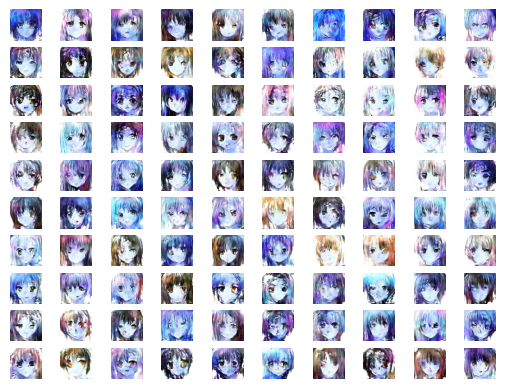

In [40]:
latent_p=generate_latent_points(100,100)
gen_im=final_model.predict(latent_p)
save_plot(gen_im,_,10)

## **Our Model is able to generate quite good quality Anime faces images.**
**This was a Deep learning project concerned with generating Anime Face images with GAN**

**BY:** *JATIN YADAV*